# 基于TORCH的exercise1
通过CNN网络实现MNIST数据集识别

* 导入库

In [24]:
import torch 
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import torch.utils.data as Data_U
import matplotlib.pyplot as plt
from keras.datasets import mnist   # 获取数据集

torch.manual_seed(1)
#from torch.utils import data # 获取迭代数据
#from torch.autograd import Variable # 获取变量
#from torchvision.datasets import mnist # 获取数据集

* 获取数据

In [25]:
train_data = torchvision.datasets.MNIST(
    root='./data/MNIST', #保存位置
    train=True, #training set
    transform=torchvision.transforms.ToTensor(),#把下载的数据改成Tensor形式  把(0-255)转换成(0-1)
    #download=True
    download=False
    
    )
test_data = torchvision.datasets.MNIST(root='./data/MNIST')
train_loader = Data_U.DataLoader(dataset=train_data, batch_size=128, shuffle=True)



#(data_train), (X_test, Y_test) = mnist.load_data()
#print(X_train.shape)
#confirm the data dimention
#print(X_train.shape,X_test.shape) 
#plt.imshow(X_train[0,:,:],cmap='gray')

* 显示数据

torch.Size([60000, 28, 28])
torch.Size([60000])


D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


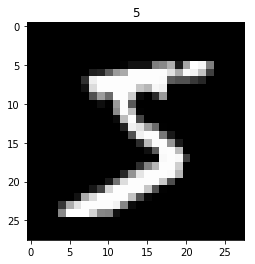

In [26]:
##呈现数据
print(train_data.train_data.size()) #(60000,28,28)
print(train_data.train_labels.size()) #(60000)
plt.imshow(train_data.train_data[0].numpy(),cmap = 'gray')
plt.title('%i' %train_data.train_labels[0])
plt.show()


* 测试数据预处理 

In [27]:
test_x = Variable(torch.unsqueeze(test_data.data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.  #测试集处理
test_y = test_data.targets[:2000]

#X_tr_tensor = transf(X_train)
#Y_tr_tensor = transf(Y_train)
#X_ts_tensor = transf(X_test)
#Y_ts_tensor = transf(Y_test)

#tr_dataset = Data.TensorDataset(X_tr_tensor,Y_tr_tensor) #把训练数据集合成一块
#tr_dataset = torchvision.(X_train) #把训练数据集合成一块
#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.


* 搭建CNN

In [28]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.lin1 =  nn.Linear(784,128)
        self.lin2 =  nn.Linear(128,64)
        self.lin3 =  nn.Linear(64,32)
        self.lin4 = nn.Linear(32,10)
        self.relu = nn.ReLU()
        self.soft = nn.Softmax()
        self.dropout = nn.Dropout(p=0.2) 
        nn.Softmax()
            
    def forward(self, x):
        x = x.view(-1, 784) 
        x = self.lin1(x)
        x = x.view(-1, 128) 
        x = self.lin2(x)
         
       # x = self.relu(x)
        x = x.view(-1, 64)
        x = self.lin3(x)
        
        x = x.view(-1,32)
        #x = self.relu(x) 
        x = self.lin4(x)
        x = self.relu(x) 
        x = self.soft(x)
        x = x.view(x.size(0), -1)
        output = self.dropout(x)
        return output

* 训练模型
 

In [29]:
cnn = CNN()
print(cnn)   #显示结构
# optimizer = torch.optim.RMSprop(cnn.parameters(), lr=0.0001, alpha=0.9, eps=1e-08, weight_decay=0)
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.0001)
loss_func = nn.CrossEntropyLoss()

CNN(
  (lin1): Linear(in_features=784, out_features=128, bias=True)
  (lin2): Linear(in_features=128, out_features=64, bias=True)
  (lin3): Linear(in_features=64, out_features=32, bias=True)
  (lin4): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
  (soft): Softmax(dim=None)
  (dropout): Dropout(p=0.2, inplace=False)
)


* 训练模型过程

In [30]:
#train_loader = Data_U.DataLoader(dataset=data_train, batch_size=128, shuffle=True)

for epoch in range(10):
    for i, (x, y) in enumerate(train_loader):
    #for i, (x, y) in enumerate(X_train, Y_train):
        batch_x = Variable(x)
        batch_y = Variable(y)
         #输入训练数据
        output = cnn(batch_x)
         #计算误差
        loss = loss_func(output, batch_y)
         #清空上一次梯度
        optimizer.zero_grad()
         #误差反向传递
        loss.backward()
         #优化器参数更新
        optimizer.step()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


* 模型预测

In [31]:
#test_output =cnn(X_ts_tensor[:10])
test_output =cnn(test_x[:10])
pred_y = torch.max(test_output,1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')          #预测值
print(test_y[:10].numpy(),'real number')    #真实值

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[3 0 0 1 9 2 1 3 9 4] prediction number
[5 0 4 1 9 2 1 3 1 4] real number


* 模型保存

In [32]:
torch.save(cnn,'net.pkl')
torch.save(cnn.state_dict(),'net_parameter.pkl')